In [5]:
#使用厦门大学镜像
local(
{
r <- getOption("repos")
r["CRAN"] <- "http://mirrors.xmu.edu.cn/CRAN/"
options(repos=r)
})
#安装需要的包
install.packages("corrplot")
install.packages("Hmisc")
install.packages("doParallel")
install.packages("ggthemes")

also installing the dependency 'viridis'



package 'viridis' successfully unpacked and MD5 sums checked
package 'Hmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\Rtmpq2zyZT\downloaded_packages
package 'doParallel' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\Rtmpq2zyZT\downloaded_packages
package 'ggthemes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\Rtmpq2zyZT\downloaded_packages


In [7]:
## the first step: set your working directory
setwd("F:/文件存档/作业/sas r/作业")
### R中的文件路径应把Windows系统默认的"\"替换为"/"

### load packages to be used, if not installed, please use ##install.packages("yourPackage")
require(readr)
require(ggplot2)
require(dplyr)
require(tidyr)
require(caret)
require(corrplot)
require(Hmisc)
require(survival)
require(Formula)
require(foreach)
require(iterators)
require(parallel)
require(doParallel)
require(ggthemes)
require(e1071)

# parallel processing set up
n_Cores <- detectCores()##检测你的电脑的CPU核数
cluster_Set <- makeCluster(n_Cores)##进行集群
registerDoParallel(cluster_Set)

In [8]:
n_Cores

[1] 8

In [10]:
cluster_Set

socket cluster with 8 nodes on host 'localhost'

In [11]:
### read in original dataset
voice_Original <- read_csv("voice.csv",col_names=TRUE)
describe(voice_Original)

Parsed with column specification:
cols(
  .default = col_double(),
  label = col_character()
)
See spec(...) for full column specifications.


voice_Original 

 21  Variables      3168  Observations
--------------------------------------------------------------------------------
meanfreq 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    3168        0     3166        1   0.1809  0.03302   0.1260   0.1411 
     .25      .50      .75      .90      .95 
  0.1637   0.1848   0.1991   0.2177   0.2291 

lowest : 0.03936334 0.04825408 0.05964549 0.05978098 0.06218231
highest: 0.24352804 0.24435645 0.24704068 0.24963659 0.25112376
--------------------------------------------------------------------------------
sd 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    3168        0     3166        1  0.05713  0.01884  0.03162  0.03396 
     .25      .50      .75      .90      .95 
 0.04195  0.05916  0.06702  0.07966  0.08549 

lowest : 0.01836324 0.02178199 0.02400167 0.02426893 0.02456279
highest: 0.11125697 0.11126049 0.11264912 0.11450804 0.11527325
----------------------------------

In [12]:
###由于本数据无缺失值，为实践插补法，在此随机去除第一个变量的30个数据作为缺失值。
## set 30 numbers in the first column into NA
set.seed(1001)
random_Number <- sample(1:3168,30)
voice_Original1 <- voice_Original
voice_Original[random_Number,1] <- NA
describe(voice_Original)

Warning message:
"关闭不再使用的链结19(<-MBENBEN-PC:11995)"Warning message:
"关闭不再使用的链结18(<-MBENBEN-PC:11995)"Warning message:
"关闭不再使用的链结17(<-MBENBEN-PC:11995)"Warning message:
"关闭不再使用的链结16(<-MBENBEN-PC:11995)"Warning message:
"关闭不再使用的链结15(<-MBENBEN-PC:11995)"Warning message:
"关闭不再使用的链结14(<-MBENBEN-PC:11995)"Warning message:
"关闭不再使用的链结13(<-MBENBEN-PC:11995)"Warning message:
"关闭不再使用的链结12(<-MBENBEN-PC:11995)"

voice_Original 

 21  Variables      3168  Observations
--------------------------------------------------------------------------------
meanfreq 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    3138       30     3136        1   0.1808  0.03309   0.1257   0.1411 
     .25      .50      .75      .90      .95 
  0.1635   0.1848   0.1991   0.2176   0.2291 

lowest : 0.03936334 0.04825408 0.05964549 0.05978098 0.06218231
highest: 0.24352804 0.24435645 0.24704068 0.24963659 0.25112376
--------------------------------------------------------------------------------
sd 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    3168        0     3166        1  0.05713  0.01884  0.03162  0.03396 
     .25      .50      .75      .90      .95 
 0.04195  0.05916  0.06702  0.07966  0.08549 

lowest : 0.01836324 0.02178199 0.02400167 0.02426893 0.02456279
highest: 0.11125697 0.11126049 0.11264912 0.11450804 0.11527325
----------------------------------

In [15]:
install.packages("ipred")
require(ipred)

Warning message:
"关闭不再使用的链结11(<-MBENBEN-PC:11995)"Warning message:
"关闭不再使用的链结10(<-MBENBEN-PC:11995)"Warning message:
"关闭不再使用的链结9(<-MBENBEN-PC:11995)"Warning message:
"关闭不再使用的链结8(<-MBENBEN-PC:11995)"Warning message:
"关闭不再使用的链结7(<-MBENBEN-PC:11995)"Warning message:
"关闭不再使用的链结6(<-MBENBEN-PC:11995)"Warning message:
"关闭不再使用的链结5(<-MBENBEN-PC:11995)"Warning message:
"关闭不再使用的链结4(<-MBENBEN-PC:11995)"also installing the dependencies 'numDeriv', 'lava', 'prodlim'



package 'numDeriv' successfully unpacked and MD5 sums checked
package 'lava' successfully unpacked and MD5 sums checked
package 'prodlim' successfully unpacked and MD5 sums checked
package 'ipred' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\Rtmpq2zyZT\downloaded_packages


Loading required package: ipred
Warning message:
"package 'ipred' was built under R version 3.3.3"

In [16]:
#对缺失值插补
### impute missing data
original_Impute <- preProcess(voice_Original,method="bagImpute")
voice_Original <- predict(original_Impute,voice_Original)

In [17]:
### compare results of imputation
compare_Imputation <- data.frame(
  voice_Original1[random_Number,1],
  voice_Original[random_Number,1]
)
compare_Imputation

meanfreq,meanfreq.1
0.2122875,0.2117257
0.1826562,0.1814900
0.2009399,0.1954627
0.1838745,0.1814900
0.1906527,0.1954627
0.2319645,0.2313031
0.1736314,0.1814900
0.2243824,0.2313031
0.1957448,0.1954627
0.2159557,0.2117257


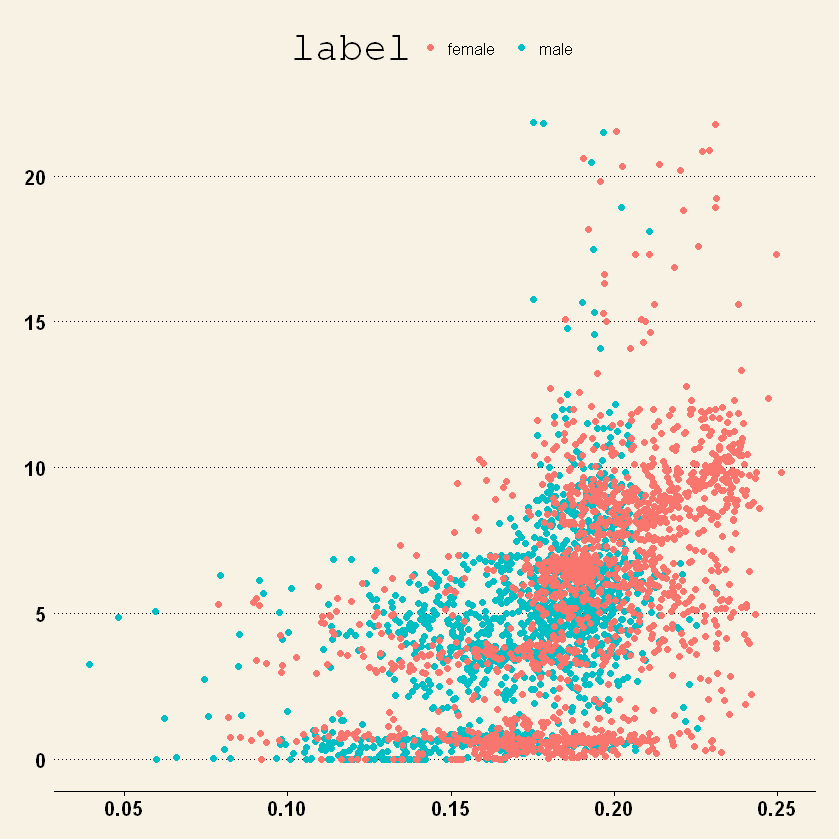

In [18]:
### visual exploration of the dataset
voice_Original%>%
  ggplot(aes(x=meanfreq,y=dfrange))+
  geom_point(aes(color=label))+
  theme_wsj()

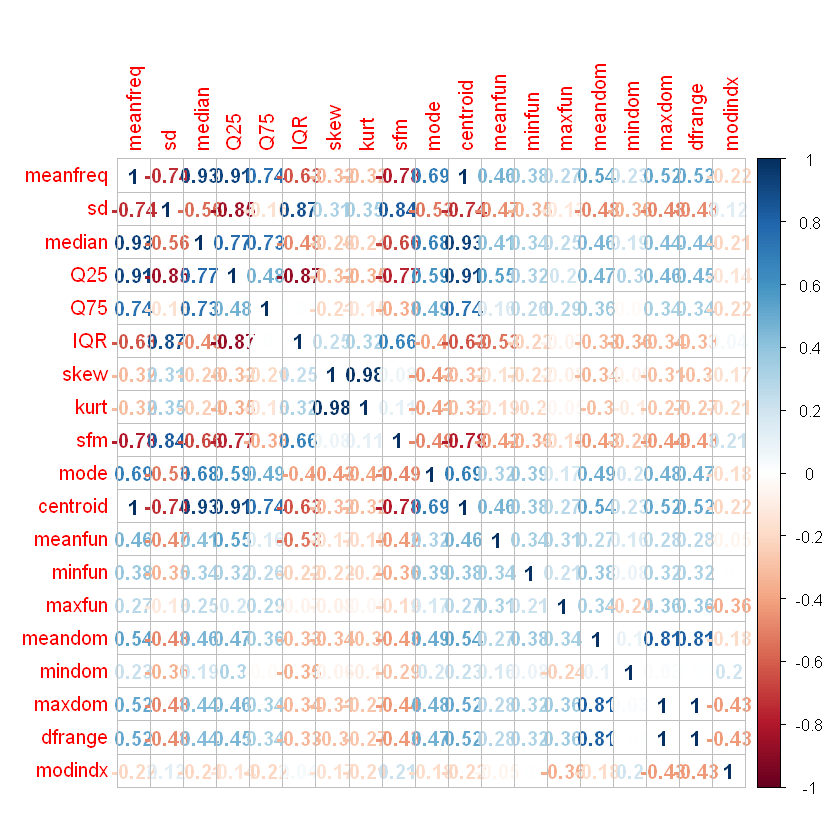

In [19]:
###find correlations between factors
factor_Corr <- cor(voice_Original[,-c(9,21)])
corrplot(factor_Corr,method="number")

In [20]:
### separate dataset into training and testing sets
sample_Index <- createDataPartition(voice_Original$label,p=0.7,list=FALSE)
voice_Train <- voice_Original[sample_Index,]
voice_Test <- voice_Original[-sample_Index,]

In [21]:
### preprocess factors for further modeling
##将数值型数据标准化，并提取主成分
pp <- preProcess(voice_Train,method=c("scale","center","pca"))
voice_Train <- predict(pp,voice_Train)
voice_Test <- predict(pp,voice_Test)

In [22]:
voice_Train

label,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
male,-8.2470186,-2.20675467,2.28386936,-5.3470699,1.16685366,-1.29183726,-1.288254363,-1.5789067775,-1.51676747,-1.2043525832
male,-8.7337738,-3.79131684,4.59834652,-4.9147088,0.46991047,-0.24915065,-0.903323838,-0.9219122968,-0.10032283,-1.8320753775
male,-9.1928479,-4.25017601,8.10931326,-3.2435342,-0.30386392,1.08563191,-0.427818665,-0.2212942565,-0.20590055,-2.2312502120
male,-3.7864552,0.08805501,-2.19776229,0.4424029,-2.69232921,-0.63140379,-1.664149723,0.0233226288,2.39133540,1.2031212130
male,-4.1824627,1.62853981,-0.72720115,-0.7926440,-1.27088222,-0.93690610,-0.391167378,-0.5666074042,0.66156808,0.5794954556
male,-0.4501543,1.80230840,-0.08564266,0.6775742,-0.55829552,-0.46375150,0.469476815,2.1117162977,-0.66595562,0.4817752905
male,-3.1808816,0.46119949,-0.08264111,1.7719961,-0.23972208,-1.32130842,-0.488010637,0.1751717470,-1.16766988,0.7442111477
male,-2.9698444,0.77419113,0.03922843,0.9721968,-1.01103690,-1.45731556,-0.775710846,-0.1404098716,-0.34500660,1.3347902363
male,-2.5858528,0.38550431,-0.12299389,1.2905520,-1.31737822,-1.42909622,-0.949127576,0.0152321111,0.14117542,1.5708235045
male,-2.9831397,-0.27162875,-0.85709284,1.9990954,-1.18882817,-0.77930983,-0.901648311,0.8013775889,0.36306869,1.1196782814


In [23]:
describe(voice_Train)

voice_Train 

 11  Variables      2218  Observations
--------------------------------------------------------------------------------
label 
       n  missing distinct 
    2218        0        2 
                        
Value      female   male
Frequency    1109   1109
Proportion    0.5    0.5
--------------------------------------------------------------------------------
PC1 
        n   missing  distinct      Info      Mean       Gmd       .05       .10 
     2218         0      2216         1 6.615e-17      3.41   -5.2489   -3.9889 
      .25       .50       .75       .90       .95 
  -2.1688    0.2968    2.0812    3.7900    4.8158 

lowest : -9.192848 -8.733774 -8.247019 -8.231570 -8.170091
highest:  6.677819  6.715478  6.800226  7.041853  7.122757
--------------------------------------------------------------------------------
PC2 
         n    missing   distinct       Info       Mean        Gmd        .05 
      2218          0       2216          1 -5.808e-16      1.733    -

In [28]:
### define formula
model_Formula <- label~PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10

###set cross-validation parameters

modelControl <- trainControl(method="repeatedcv",number=5,
                             repeats=5,allowParallel=TRUE)

In [29]:
### model 1: logistic regression
glm_Model <- train(model_Formula,data=voice_Train,method="glm",trControl=modelControl)

In [36]:
#预测
voice_Test1 <- voice_Test[,-1]
voice_Test1$glmPrediction <- predict(glm_Model,voice_Test1)
table(voice_Test$label,voice_Test1$glmPrediction)

        
         female male
  female    460   15
  male        6  469

In [37]:
### model 2:linear discrimant analysis
lda_Model <- train(model_Formula,
                   data=voice_Train,
                   method="lda",
                   trControl=modelControl)

voice_Test1$ldaPrediction <- predict(lda_Model,voice_Test1)
table(voice_Test$label,voice_Test1$ldaPrediction)

Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



        
         female male
  female    447   28
  male        7  468

In [39]:
### model 3: random forrest
rf_Model <- train(model_Formula,
                  data=voice_Train,
                  method="rf",
                  trControl=modelControl,
                  ntrees=500)
voice_Test1$rfPrediction <- predict(rf_Model,voice_Test1)
table(voice_Test$label,voice_Test1$rfPrediction)

Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:Hmisc':

    combine

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin



        
         female male
  female    459   16
  male        9  466


Call:
summary.resamples(object = model_Comparison)

Models: LogisticRegression, LinearDiscrimant, RandomForest 
Number of resamples: 25 

Accuracy 
                     Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
LogisticRegression 0.9572  0.9640 0.9707 0.9706  0.9775 0.9820    0
LinearDiscrimant   0.9550  0.9640 0.9661 0.9675  0.9730 0.9820    0
RandomForest       0.9502  0.9595 0.9685 0.9671  0.9752 0.9842    0

Kappa 
                     Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
LogisticRegression 0.9144  0.9279 0.9413 0.9412  0.9550 0.9640    0
LinearDiscrimant   0.9099  0.9279 0.9323 0.9349  0.9459 0.9640    0
RandomForest       0.9005  0.9189 0.9369 0.9342  0.9503 0.9685    0


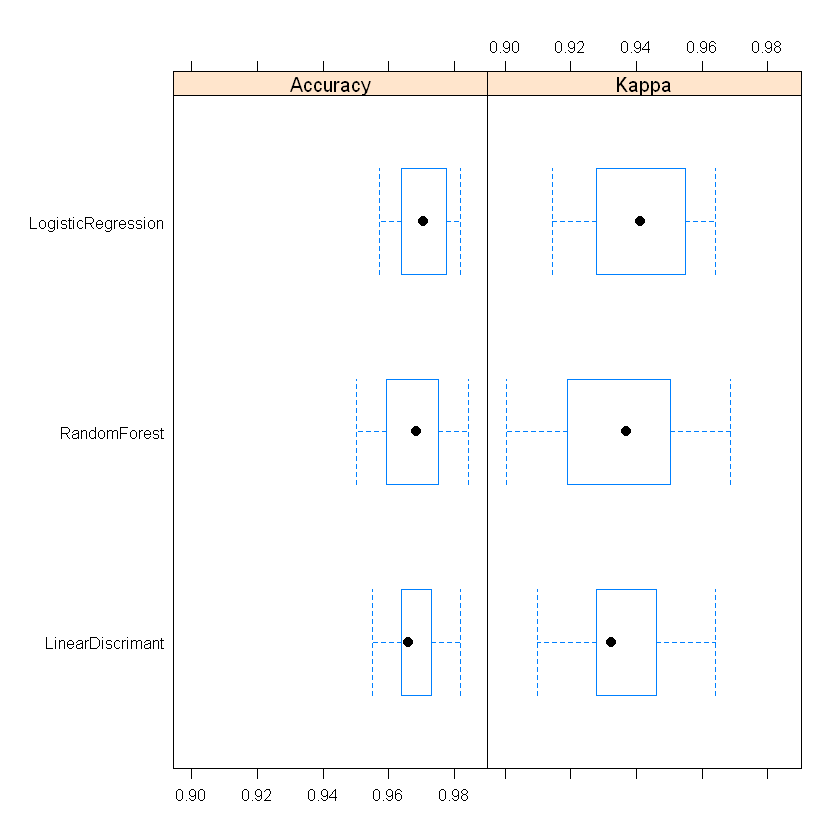

In [67]:
### which model is the best?
model_Comparison <- 
  resamples(list(
    LogisticRegression=glm_Model,
    LinearDiscrimant=lda_Model,
    RandomForest=rf_Model
  ))
summary(model_Comparison)
bwplot(model_Comparison,layout=c(2,1))

In [63]:
summary(glm_Model)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0335  -0.0603   0.0003   0.1231   4.1364  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.65452    0.15922  -4.111 3.94e-05 ***
PC1         -1.17463    0.07680 -15.295  < 2e-16 ***
PC2          1.57637    0.12634  12.477  < 2e-16 ***
PC3         -0.03916    0.10023  -0.391  0.69605    
PC4          0.98009    0.10023   9.778  < 2e-16 ***
PC5         -3.07344    0.23013 -13.355  < 2e-16 ***
PC6          0.13356    0.16156   0.827  0.40841    
PC7         -2.83419    0.21867 -12.961  < 2e-16 ***
PC8         -0.54508    0.17211  -3.167  0.00154 ** 
PC9         -3.12013    0.25928 -12.034  < 2e-16 ***
PC10        -0.23281    0.22410  -1.039  0.29887    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3074.80  on 2217  degrees of freedom
Residual deviance:  429.05  on 2207  degr